# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Mar 2017

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [152]:
df = pd.read_csv('last_2yr_restaurant_reviews.csv')

In [153]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,type,useful,user_id,count
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-26,0,nCqdz-NW64KazpxqnDr0sQ,1,I mainly went for the ceasar salad prepared ta...,review,0,0XVzm4kVIAaH4eQAxWbhvw,1
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,review,0,2aeNFntqY2QDZLADNo8iQQ,1
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-04-05,0,2HrBENXZTiitcCJfzkELgA,2,To be honest it really quit aweful. First the ...,review,0,WFhv5pMJRDPWSyLnKiWFXA,1
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-02-16,0,6YNPXoq41qTMZ2TEi0BYUA,2,"The food was decent, but the service was defin...",review,0,2S6gWE-K3DHNcKYYSgN7xA,1
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-02-08,1,4bQrVUiRZ642odcKCS0OhQ,2,If you're looking for craptastic service and m...,review,1,rCTVWx_Tws2jWi-K89iEyw,1


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [215]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents=df["text"].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [216]:
# Make a column and take the values, save to a variable named "target"
df['perfectscore']=(df['stars']>4)
df['perfectscore']=df['perfectscore'] * 1
target=df['perfectscore'].values
target

array([0, 0, 0, ..., 1, 1, 0])

#### You may want to look at the statistic of the target variable

In [217]:
# To be implemented
target[1:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 0])

### Create training dataset and test dataset

In [218]:
from sklearn.cross_validation import train_test_split

In [231]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, test_size=0.88, random_state=42)
documents_train1, documents_test1, target_train1, target_test1 = train_test_split(documents, target, test_size=0.3, random_state=42)


In [220]:
documents_train.shape

(41714,)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [222]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [223]:
# Train the model with your training data
train_vectors=vectorizer.fit_transform(documents_train).toarray()
train_vectors.shape

(41714, 1000)

In [232]:
train_vectors1=vectorizer.fit_transform(documents_train1).toarray()
test_vectors1=vectorizer.transform(documents_test1).toarray()

In [224]:
# Get the vocab of your tfidf
vocab=vectorizer.get_feature_names()


In [225]:
# Use the trained model to transform all the reviews
y_test=target_test
x_test=vectorizer.transform(documents_test).toarray()
x_train=train_vectors
y_train=target_train

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [165]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(train_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [166]:
# To be implemented
kmeans.predict(x_test).shape

(305905,)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [167]:
# To be implemented
print "cluster centers:"
print kmeans.cluster_centers_
print kmeans.cluster_centers_.shape

cluster centers:
[[ 0.00265707  0.00731115  0.00310438 ...,  0.00052256  0.00282245
   0.00711899]
 [ 0.00088609  0.00513404  0.00185774 ...,  0.00114475  0.00401016
   0.00642387]
 [ 0.00205197  0.00935856  0.00163213 ...,  0.00166868  0.00678275
   0.00969197]
 ..., 
 [ 0.00150206  0.00456697  0.00220215 ...,  0.00084444  0.0022242
   0.00856657]
 [ 0.00108235  0.00415187  0.00096545 ...,  0.00137738  0.00271845
   0.00777163]
 [ 0.00430563  0.01949605  0.00307583 ...,  0.00388059  0.00045283
   0.00159974]]
(8, 1000)


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [168]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
top_centroids

array([[105, 336, 106, 356, 139, 775, 640, 322, 364, 441],
       [ 72,  25, 935, 640, 322, 497, 771, 218, 933, 457],
       [144, 332, 356, 322, 882, 716, 640, 596, 364, 218],
       [356, 322, 640, 470, 689, 441, 771, 562, 596, 890],
       [638, 198, 640, 356, 364, 793, 139,  72, 595, 470],
       [860, 725, 724, 640, 364,  51, 330, 771, 356, 261],
       [364, 322, 771, 640, 356,  49, 334,  40, 825, 890],
       [322, 595, 536, 890, 771, 441, 119, 862, 358,  37]])

In [169]:
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(vocab[i] for i in centroid))

top features for each cluster:
0: burger, fries, burgers, good, cheese, shake, place, food, great, just
1: best, amazing, vegas, place, food, love, service, delicious, ve, las
2: chicken, fried, good, food, thai, rice, place, ordered, great, delicious
3: good, food, place, like, really, just, service, nice, ordered, time
4: pizza, crust, place, good, great, slice, cheese, best, order, like
5: sushi, rolls, roll, place, great, ayce, fresh, service, good, eat
6: great, food, service, place, good, awesome, friendly, atmosphere, staff, time
7: food, order, minutes, time, service, just, came, table, got, asked


#### Try different k
If you set k == to a different number, how does the top features change?

In [170]:
# To be implemented
kmeans = KMeans(n_clusters=5)

kmeans.fit(train_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [171]:
print "cluster centers:"
print kmeans.cluster_centers_
print kmeans.cluster_centers_.shape
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
top_centroids
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(vocab[i] for i in centroid))

cluster centers:
[[ 0.00279838  0.00707944  0.00163985 ...,  0.00165575  0.00267186
   0.00879909]
 [ 0.00425447  0.01572545  0.00309208 ...,  0.0031685   0.00092617
   0.00249052]
 [ 0.00151011  0.0045272   0.00226846 ...,  0.0008933   0.00234304
   0.00835076]
 [ 0.00095077  0.00416154  0.00107549 ...,  0.00132477  0.00280535
   0.00721529]
 [ 0.00203628  0.00560123  0.00210001 ...,  0.00117714  0.00465785
   0.00779937]]
(5, 1000)
top features for each cluster:
0: pizza, crust, place, good, great, slice, cheese, best, order, just
1: food, just, order, time, burger, like, service, got, good, place
2: sushi, roll, rolls, place, great, ayce, fresh, service, good, eat
3: great, food, service, place, good, amazing, awesome, love, friendly, staff
4: good, food, place, best, vegas, chicken, delicious, service, amazing, love


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [175]:
# To be implemented
assigned_cluster = kmeans.predict(train_vectors)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, train_vectors.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "#######cluster__%d:" % i
    for review in sample_reviews:
        print "  %d----: " % df['stars'].values[review],
        print "   "
        print "   %s" % documents_train[review]
        

#######cluster__0:
  4----:     
   Tiny little pizza place in the Cosmo, right across from STK.  If you don't know it's there, you'll never find it. Stopped by here for a midnight snack.  We got a full pizza with pepperoni, sausage, and mushroom. I don't know what they do to it, but it was really tasty pizza.  Not super thin crust, but also not too thick and bready.   A good amount of toppings too.  Expensive for a hole in the wall pizza place though.  It's $30 for a large pizza and 3 toppings.
  5----:     
   This place has been around for as long as I can remember. It's in a pretty bare shopping center on Jones/95. A dive bar in the front, with a restaurant in the back. I like that there is a door that separates the smoky bar from the dining room. I have tried a lot of food here, what I like the most is definitely the pizza. The pizza's are sicilian style, with a thick, buttery crust that's cut into 8 squares. One of the pizza's they offer has 7 toppings of your choice, so we usual

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [176]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
#df.groupby('business_id').sum().sort("count",ascending=False)
sort_review=df.groupby('business_id').sum().sort("count",ascending=False)
top_id=sort_review.index[0]
df_top_restaurant=df[df['business_id']==top_id]


/Users/sunnywang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


We can also load restaurant profile information from the business dataset (optional)

In [177]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [178]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant=df_top_restaurant["text"].values

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [179]:
# To be implemented
df_top_restaurant['perfectscore']=(df_top_restaurant['stars']>4)
df_top_restaurant['perfectscore']=df_top_restaurant['perfectscore'] * 1
top_target=df_top_restaurant['perfectscore'].values
top_target

/Users/sunnywang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sunnywang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([1, 1, 1, ..., 0, 1, 1])

#### Check the statistic of the target variable

In [180]:
# To be implemented
top_target[1:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0])

### Create training dataset and test dataset

In [181]:
from sklearn.cross_validation import train_test_split

In [182]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
top_documents_train, top_documents_test, top_target_train, top_target_test = train_test_split(documents_top_restaurant, top_target, test_size=0.3, random_state=42)


### Get NLP representation of the documents

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [200]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [201]:
# Train the model with your training data
train_vectors=vectorizer.fit_transform(top_documents_train).toarray()
train_vectors.shape

(2810, 1000)

In [202]:
# Get the vocab of your tfidf
vocab=vectorizer.get_feature_names()
vocab

[u'00',
 u'10',
 u'100',
 u'10pm',
 u'11',
 u'12',
 u'15',
 u'1am',
 u'20',
 u'25',
 u'2nd',
 u'30',
 u'3pm',
 u'40',
 u'45',
 u'50',
 u'55',
 u'65',
 u'6pm',
 u'95',
 u'99',
 u'able',
 u'absolutely',
 u'accommodating',
 u'actually',
 u'add',
 u'added',
 u'adults',
 u'affordable',
 u'ago',
 u'ahead',
 u'airport',
 u'ala',
 u'alot',
 u'alright',
 u'amazing',
 u'ambiance',
 u'ambience',
 u'american',
 u'angeles',
 u'appetite',
 u'appetizer',
 u'appetizers',
 u'apple',
 u'apps',
 u'area',
 u'aren',
 u'arrived',
 u'asian',
 u'ask',
 u'asked',
 u'asking',
 u'asparagus',
 u'assortment',
 u'ate',
 u'atmosphere',
 u'attention',
 u'attentive',
 u'attitude',
 u'authentic',
 u'available',
 u'average',
 u'avoid',
 u'away',
 u'awesome',
 u'ayce',
 u'background',
 u'bacon',
 u'bad',
 u'ban',
 u'banana',
 u'banchan',
 u'banchans',
 u'bap',
 u'bar',
 u'barbecue',
 u'based',
 u'basically',
 u'bay',
 u'bbq',
 u'bean',
 u'beat',
 u'beautiful',
 u'beef',
 u'beer',
 u'believe',
 u'belly',
 u'best',
 u'bett

In [205]:
# Use the trained model to transform the test data
Y_test=top_target_test
X_test=vectorizer.transform(top_documents_test).toarray()

In [206]:
# Use the trained model to transform all the data
alldata_vectors=vectorizer.transform(documents_top_restaurant)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [207]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(train_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [208]:
# To be implemented
kmeans.predict(alldata_vectors)

array([2, 4, 1, ..., 0, 2, 2], dtype=int32)

#### Inspect the centroids

In [209]:
# To be implemented
print "cluster centers:"
print kmeans.cluster_centers_
print kmeans.cluster_centers_.shape
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
top_centroids


cluster centers:
[[  1.15162648e-03   7.01059423e-03   2.51601212e-03 ...,   5.88318864e-03
    1.07279973e-02   9.30864360e-04]
 [  6.08144416e-04   1.15631272e-02   1.13654053e-03 ...,   8.06404405e-03
    1.05012330e-02  -4.22838847e-18]
 [ -6.17995238e-18   5.15008344e-03   2.81892565e-18 ...,  -6.07153217e-18
    5.80265195e-03   6.33919911e-04]
 ..., 
 [  1.72494532e-03   4.84539043e-03   1.81297187e-03 ...,   2.67779908e-03
    1.28886011e-02   2.31737578e-03]
 [  1.82901087e-03   5.96988768e-03   3.85319087e-03 ...,   1.34441069e-17
    3.55023478e-03  -2.05998413e-18]
 [ -5.20417043e-18   6.58904548e-04   2.60208521e-18 ...,   4.19378874e-03
    7.38433116e-03   1.55754259e-03]]
(8, 1000)


array([[325, 627, 770, 218, 357, 217, 944, 528, 360, 166],
       [375, 399, 360, 325, 357, 627, 770,  64, 129, 217],
       [360, 325, 770, 627,  55,  35, 217, 166, 218, 932],
       [527, 504, 503, 588, 360, 357, 358, 164, 325, 217],
       [883, 166, 325, 770, 360, 627, 217, 932, 357, 169],
       [818, 650, 438, 148,  86,  83, 456, 357, 665, 117],
       [ 87, 456,  79, 932, 461, 931, 325, 360, 627, 770],
       [357, 690, 627, 325, 770, 561, 456,  79, 677, 695]])

#### Find the top 10 features for each cluster.

In [210]:
# To be implemented
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(vocab[i] for i in centroid))

top features for each cluster:
0: food, place, service, delicious, good, definitely, wait, meats, great, come
1: happy, hour, great, food, good, place, service, awesome, came, definitely
2: great, food, service, place, atmosphere, amazing, definitely, come, delicious, vegas
3: meat, lovers, lover, ordered, great, good, got, combo, food, definitely
4: time, come, food, service, great, place, definitely, vegas, good, coming
5: spicy, pork, kalbi, chicken, belly, beef, korean, good, prime, bulgogi
6: best, korean, bbq, vegas, las, ve, food, great, place, service
7: good, really, place, food, service, nice, korean, bbq, quality, recommend


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [211]:
df_top_restaurant["stars"].values[1]
                 

5

In [212]:
# To be implemented
assigned_cluster = kmeans.predict(train_vectors)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, train_vectors.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "###cluster__%d:" % i
    for review in sample_reviews:
        print "  %d----: " % df_top_restaurant['stars'].values[review],
        print "   %s" % top_documents_train[review]
        

###cluster__0:
  5----:     Ordered the Gangnam combo and pretty much ate everything that had come out. 

 Pros
My favorite was the Fried calamari and marinated peppers.  

Cons
Food took a bit longer than expected.  Fresh oysters were not as fresh as I had wanted...keeping fingers crossed for now.

Overall this is Vegas and met my standards.
  5----:     Awesome place!  The meats were delightful, the Kobe beef was amazing, and the Kobe Ssam was awesome! The service was just right . We will be coming back!
###cluster__1:
  4----:     Excellent food excellent service especially for happy hour cuz the food and beer is worth the price
  5----:     Great food and service. Close to Campus and strip. Love the side dishes. The happy hour promo is great. Delicious ~
###cluster__2:
  5----:     Solid food, free dessert. I really like the beef noodles.

They have a great atmosphere and nice food. Service was fast. Great selection of k-pop.
  5----:     Meat on meats!! A great experience here. $6

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [233]:
y_test=target_test1
x_test=test_vectors1
x_train=train_vectors1
y_train=target_train1

In [234]:
x_test.shape, x_train.shape

((104286, 1000), (243333, 1000))

In [235]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)


### Use PCA to transform data (train and test) and get princial components

In [236]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
pca = PCA(n_components)

train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled)
train_components.shape

(243333, 50)

In [237]:
pca.components_.shape

(50, 1000)

### See how much (and how much percentage of) variance the principal components explain

In [238]:
# To be implemented
print pca.explained_variance_[:20]

[ 5.50698022  4.42841682  3.26813021  2.90283008  2.78806977  2.68706694
  2.54215919  2.44903779  2.36635725  2.29755075  2.2752472   2.20846781
  2.14792386  2.07853838  1.9972868   1.98648539  1.93761143  1.90152913
  1.88339629  1.86008721]


In [239]:
# To be implemented
print pca.explained_variance_ratio_[:20]

[ 0.00550698  0.00442842  0.00326813  0.00290283  0.00278807  0.00268707
  0.00254216  0.00244904  0.00236636  0.00229755  0.00227525  0.00220847
  0.00214792  0.00207854  0.00199729  0.00198649  0.00193761  0.00190153
  0.0018834   0.00186009]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

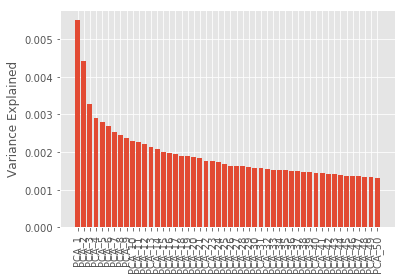

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# To be implemented

pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_ratio_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
from sklearn.linear_model import LogisticRegression
model_lrc=LogisticRegression()
model_lrc.fit(X_train_scaled, y_train)

In [ ]:
# Get score for training set
model_lrc.score(X_train_scaled, y_train)

In [ ]:
# Get score for test set
model_lrc.score(X_test_scaled, y_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
model_lrc=LogisticRegression()
model_lrc.fit(train_components, y_train)

In [ ]:
# Get score for training set
model_lrc.score(train_components, y_train)

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc.score(test_components, y_test)

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: Difference score between PCA data is smaller than regular data running

#### You can plot the coefficients against principal components


In [ ]:
coeff

In [ ]:
PCA=pca_range
coeff=model_lrc.coef_[0]
daf={'PCA': PCA, 'coeff':coeff}
daf=pd.DataFrame(daf)
daf

In [ ]:
# To be implemented
daf.plot(x="PCA", y="coeff", style="b")

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train_scaled, y_train)

In [ ]:
# Get score for training set
model_rfc.score(X_train_scaled, y_train)

In [ ]:
# Get score for test set
model_rfc.score(X_test_scaled, y_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfc=RandomForestClassifier()
model_rfc.fit(train_components, y_train)

In [ ]:
# Get score for training set
model_rfc.score(train_components, y_train)

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(test_components, y_test)

#### Q: What do you see from the training result and the test result?

A: Looks like Random forest methond with PCA didnt solve overfittinh problem as strongly as Logistic regression

#### You can plot the feature importances against principal components


In [149]:
# To be implemented
PCA=pca_range
coeff=model_rfc.feature_importances_
daf={'PCA': PCA, 'feature_import':coeff}
daf=pd.DataFrame(daf)
daf

,PCA,feature_import
0,1,0.156377
1,2,0.023822
2,3,0.063550
3,4,0.020499
4,5,0.027723
5,6,0.041749
6,7,0.027890
7,8,0.034670
8,9,0.016073
9,10,0.015543


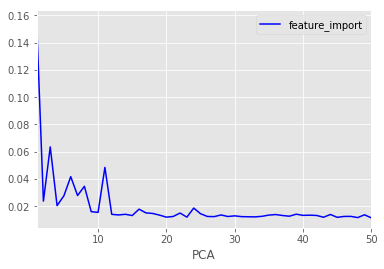

In [150]:
daf.plot(x="PCA", y="feature_import", style="b")

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented